In [0]:
 ## Import packages
 import matplotlib.pyplot as plt
 import numpy as np

 import tensorflow as tf
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Dense, Activation, Flatten
 from tensorflow.keras.layers import Conv2D, MaxPooling2D

 from tensorflow.keras.datasets import cifar10
 from tensorflow.keras.preprocessing.image  import ImageDataGenerator

 #from sklearn.preprocessing import StandardScaler
 #from sklearn.model_selection import train_test_split

In [0]:
 ## load data
 (X_train ,y_train), (X_test, y_test) = cifar10.load_data()

[1]


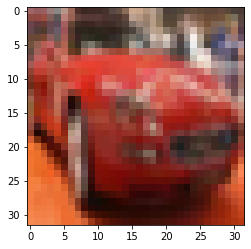

In [3]:
## display a image
plt.imshow(X_train[5])
print(y_train[5])

In [0]:
 ## normalized  images
X_train = X_train / 255.0
X_test = X_test / 255.0



[2]


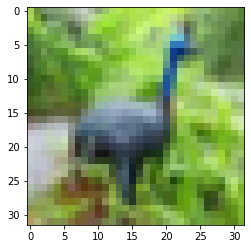

In [5]:
plt.imshow(X_train[6])
print(y_train[6])

In [0]:
## build model
model = Sequential()

In [0]:
## craete layers CNN
### add convolutional layer1
model.add(Conv2D(filters=256,kernel_size=(3,3),input_shape=X_train.shape[1:]))
model.add(Activation('relu'))

In [0]:
 ### add pooling layer1
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
### add convolutional layer2
model.add(Conv2D(filters=256,kernel_size=(3,3)))
model.add(Activation('relu'))

In [0]:
 ### add pooling layer2
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
### add flatten layerr
model.add(Flatten())

In [0]:
### add Fully connected layeres
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
## copile our  model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])

In [14]:
## summary model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 256)       7168      
_________________________________________________________________
activation (Activation)      (None, 30, 30, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 256)       590080    
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [0]:
## fit data to model (training)
batch_size = 64
epochs = 100
model.fit(X_train,y_train, batch_size=batch_size,epochs=epochs)

Epoch 1/100
259/782 [========>.....................] - ETA: 8:14 - loss: 1.6752 - sparse_categorical_accuracy: 0.3903

KeyboardInterrupt: ignored

In [0]:
##evaluate  model on test set
test_loss ,test_acc  = model.evaluate(X_test,y_test)

print(f'test loss {test_loss} and test accuracy {test_acc}')